In [3]:
import numpy as np
import pandas as pd

In [37]:
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import plotly.express as px
import plotly.graph_objects as go

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7,7
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Using keras for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [6]:
file_path = '/kaggle/input/waterneeded/TARP.csv'
# Laod from the dataset 
names = ['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time', 
         'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)',
         'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K',
         'status'
        ]
irrigation_df = pd.read_csv(file_path, names=names, header=0)

In [7]:
print(irrigation_df.shape)
irrigation_df.sample(5)
# N° of rows 
print("Rows: ",irrigation_df.shape[0])

# Column names
print("Columns: ",irrigation_df.columns.tolist())

# Data types
print("Data Type: \n",irrigation_df.dtypes)

(100000, 15)
Rows:  100000
Columns:  ['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time', 'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)', 'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K', 'status']
Data Type: 
 Soil Moisture            int64
Temperature              int64
 Soil Humidity           int64
Time                     int64
Air temperature (C)    float64
Wind speed (Km/h)      float64
Air humidity (%)       float64
Wind gust (Km/h)       float64
Pressure (KPa)         float64
ph                     float64
rainfall               float64
N                      float64
P                      float64
K                      float64
status                  object
dtype: object


In [8]:
data = irrigation_df
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean', '25%', '50%', '75%', 'range', 'std']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
mean,45.484070,22.536100,45.016790,55.253650,24.263780,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
25%,23.000000,11.000000,32.000000,28.000000,18.580000,6.830000,33.980000,21.820000,100.980000,5.971693,64.551686,21.000000,28.000000,20.000000
median,45.000000,23.000000,45.000000,55.000000,22.150000,9.530000,61.310000,37.240000,101.120000,6.425045,94.867624,37.000000,51.000000,32.000000
75%,68.000000,34.000000,58.000000,83.000000,29.590000,12.460000,86.360000,59.275000,101.260000,6.923643,124.267508,84.250000,68.000000,49.000000
range,89.000000,45.000000,50.000000,110.000000,34.340000,31.360000,95.410000,133.330000,1.360000,6.430338,278.348850,140.000000,140.000000,200.000000
std,25.993998,13.251352,14.726676,32.093033,6.756751,4.325666,30.073448,24.168987,0.218448,0.773938,54.958389,36.917334,32.985883,50.647931


In [9]:
# I am gonna drop the time column: As time doesn't have enough information or the purpose 
data.drop('Time', axis=1, inplace=True)
data.head(3)

,Soil Moisture,Temperature,Soil Humidity,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,status
0,54,22,70,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON


In [10]:
#Checking for NaN values:
check_for_nan = data.isnull().values.any()
sum_nan = data.isnull().sum().sum()
sum_nan_col = data.isnull().sum()
print("NaN Exist ? ", check_for_nan)
print("NaN Sum : ", sum_nan)
print("NaN Sum By Columns: \n", sum_nan_col)

NaN Exist ?  True
NaN Sum :  869025
NaN Sum By Columns: 
 Soil Moisture              0
Temperature                0
 Soil Humidity             0
Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
ph                     97800
rainfall               97800
N                      97800
P                      97800
K                      97800
status                     0
dtype: int64


In [11]:
#dropping ph,N,P,K:
data.drop('ph', axis=1, inplace=True)
data.drop('rainfall', axis=1, inplace=True)
data.drop('N', axis=1, inplace=True)
data.drop('P', axis=1, inplace=True)
data.drop('K', axis=1, inplace=True)

data.head(3)

,Soil Moisture,Temperature,Soil Humidity,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),status
0,54,22,70,19.52,2.13,55.04,6.30,101.50,ON
1,12,20,40,19.49,2.01,55.17,10.46,101.50,OFF
2,34,26,35,19.47,1.90,55.30,14.63,101.51,ON


In [12]:
check_for_nan = data.isnull().values.any()
sum_nan = data.isnull().sum().sum()
sum_nan_col = data.isnull().sum()
print("NaN Exist ? ", check_for_nan)
print("NaN Sum : ", sum_nan)
print("NaN Sum By Columns: \n", sum_nan_col)

NaN Exist ?  True
NaN Sum :  380025
NaN Sum By Columns: 
 Soil Moisture              0
Temperature                0
 Soil Humidity             0
Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
status                     0
dtype: int64


In [13]:
#Cleaning Dataset:
def status_to_binary(status):
    if status == 'ON':
        val = 1
    elif status == 'OFF':
        val = 0
        
    return val



In [14]:
data['status'] = data['status'].apply(status_to_binary)
data.head()

,Soil Moisture,Temperature,Soil Humidity,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),status
0,54,22,70,19.52,2.13,55.04,6.30,101.50,1
1,12,20,40,19.49,2.01,55.17,10.46,101.50,0
2,34,26,35,19.47,1.90,55.30,14.63,101.51,1
3,7,44,44,19.54,2.28,54.20,16.08,101.51,0
4,50,38,23,19.61,2.66,53.09,17.52,101.51,0


In [15]:
#dropping all NaN values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

new_data = clean_dataset(data)
new_data.shape


(23995, 9)

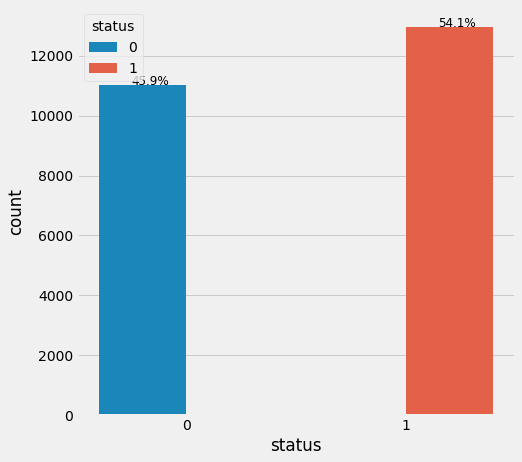

In [16]:
ax = sns.countplot(x="status", hue="status", data=data)
# calculate percetage
def calc_percentage(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
calc_percentage(ax, data.status)

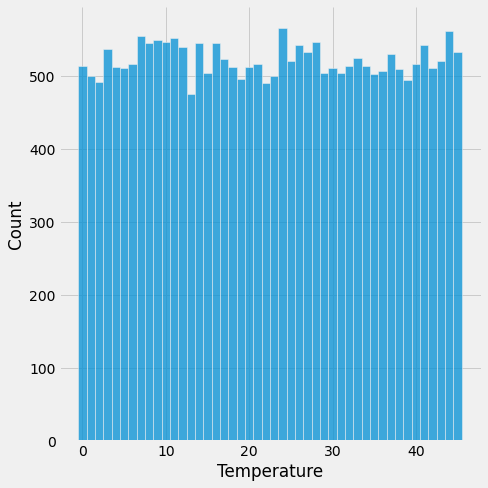

In [17]:
#Temperature Distribution:
sns.displot(data,x="Temperature",binwidth=3,bins=20,discrete=True,height=7)

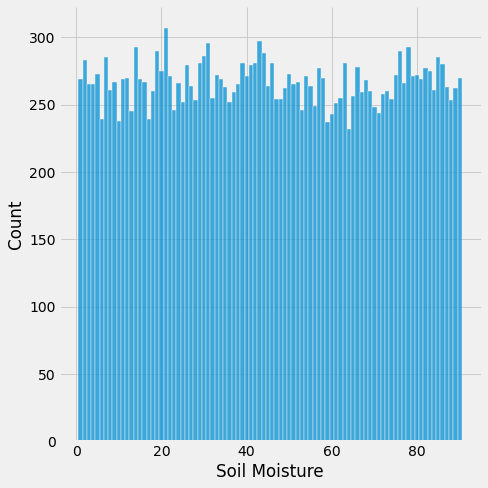

In [18]:
# Soil Moisture Distribution:
sns.displot(data, x="Soil Moisture", binwidth=3, bins=20, discrete=True, height=7)

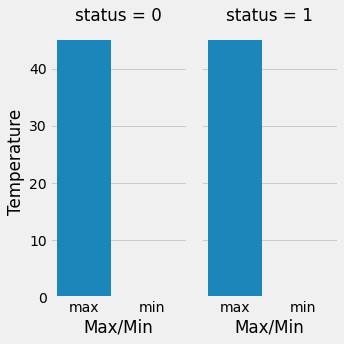

In [19]:
# On/ Off based to temperature
status_agg = data.groupby('status').agg({'Temperature': ['min', 'max']}) #status _aggregation
status_values = pd.merge(status_agg['Temperature']['max'], status_agg['Temperature']['min'],right_index=True,left_index=True )
status_values = pd.melt(status_values.reset_index(), ['status']).rename(columns={'variable':'Max/Min', 'value': 'Temperature'})
status_values.head()
g = sns.FacetGrid(status_values, col="status", height=5, aspect=.5, hue='Max/Min')
g.map(sns.barplot, "Max/Min", "Temperature", order=["max", "min"])

In [20]:
#Splitting Dataset "Training 70%,Testing 30%":
# 8 feauture
X = new_data.iloc[:, :-1].values
print(X.shape)
# status
y = new_data["status"].values
print(y.shape)

(23995, 8)
(23995,)


In [21]:
# splitting dataset Train, Test (70%, 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

In [22]:
np.mean(y), np.mean(1-y)

(0.5406543029797874, 0.45934569702021255)

In [23]:
is_nan = np.any(np.isnan(data))
is_finite = np.all(np.isfinite(data))
print(is_nan)
print(is_finite)

False
True


In [24]:
data = data.reset_index()

In [25]:
# Random Forest:
# Train RF model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
# Predict
y_pred_class_rf = rf_model.predict(X_test)
# Predict Probabilities
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Accuracy
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
# Metric 
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))


accuracy is 0.732
roc-auc is 0.795


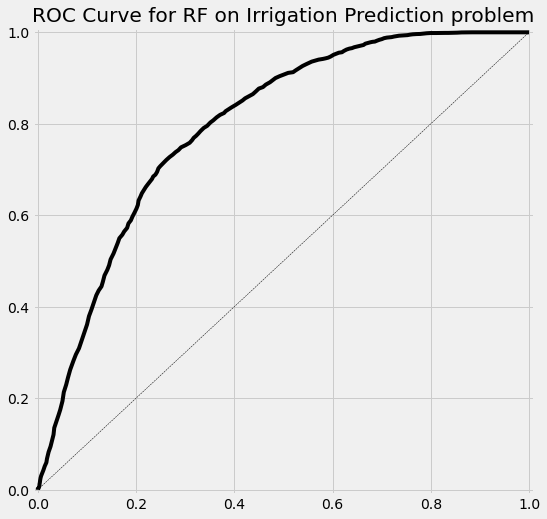

In [27]:
def plot_roc(y_test, y_pred, model_name):
    # False Positive Rate, True Positive Rate, Thrshould
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Irrigation Prediction problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

In [28]:
## Building Neural Network:
## Normalizing the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [29]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

2022-11-30 09:35:32.239789: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

2022-11-30 09:35:32.440983: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
525/525 [==============================] - 2s 3ms/step - loss: 0.7290 - accuracy: 0.4514 - val_loss: 0.7042 - val_accuracy: 0.4710
Epoch 2/200
525/525 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5133 - val_loss: 0.6863 - val_accuracy: 0.5604
Epoch 3/200
525/525 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.5820 - val_loss: 0.6733 - val_accuracy: 0.6061
Epoch 4/200
525/525 [==============================] - 1s 2ms/step - loss: 0.6672 - accuracy: 0.6188 - val_loss: 0.6622 - val_accuracy: 0.6358
Epoch 5/200
525/525 [==============================] - 1s 2ms/step - loss: 0.6566 - accuracy: 0.6455 - val_loss: 0.6524 - val_accuracy: 0.6536
Epoch 6/200
525/525 [==============================] - 1s 2ms/step - loss: 0.6473 - accuracy: 0.6599 - val_loss: 0.6438 - val_accuracy: 0.6654
Epoch 7/200
525/525 [==============================] - 1s 2ms/step - loss: 0.6391 - accuracy: 0.6714 - val_loss: 0.6362 - val_accuracy: 0.6720

In [32]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = y_pred_class_nn_1 = np.argmax(model_1.predict(X_test_norm), axis=-1)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

accuracy is 0.458
roc-auc is 0.758


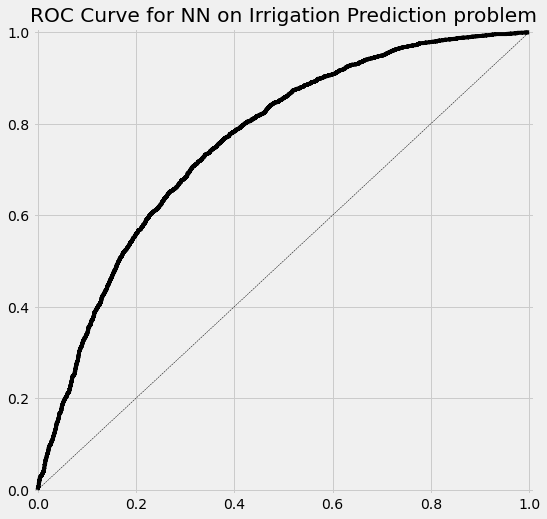

In [33]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [34]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

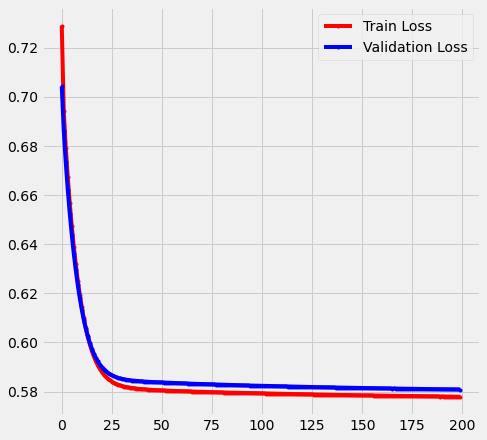

In [35]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
y_pred_class_nn_2 = np.argmax(model_2.predict(X_test_norm), axis=-1)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2'